In [1]:
import polars as pl

# 读取数据
data = pl.read_parquet("hourly_data.pa")

# 排序数据
df = data.sort('open_time').sort("symbol")

# 计算每个时刻的价格变动
df = df.with_columns([
    (pl.col("close") - pl.col("open")).alias("price_change"),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

# 计算成交量加权的价格变动
df = df.with_columns([
    (pl.col("price_change") * pl.col("volume")).alias("volume_weighted_price_change")
])

print(df)

shape: (2_483_434, 15)
┌─────────────┬────────┬────────┬────────┬───┬─────────────┬─────────────┬───────────┬─────────────┐
│ open_time   ┆ open   ┆ high   ┆ low    ┆ … ┆ symbol      ┆ price_chang ┆ return    ┆ volume_weig │
│ ---         ┆ ---    ┆ ---    ┆ ---    ┆   ┆ ---         ┆ e           ┆ ---       ┆ hted_price_ │
│ datetime[μs ┆ f64    ┆ f64    ┆ f64    ┆   ┆ str         ┆ ---         ┆ f64       ┆ change      │
│ ]           ┆        ┆        ┆        ┆   ┆             ┆ f64         ┆           ┆ ---         │
│             ┆        ┆        ┆        ┆   ┆             ┆             ┆           ┆ f64         │
╞═════════════╪════════╪════════╪════════╪═══╪═════════════╪═════════════╪═══════════╪═════════════╡
│ 2022-09-09  ┆ 0.4728 ┆ 0.4874 ┆ 0.3663 ┆ … ┆ 1000LUNCUSD ┆ -0.0218     ┆ null      ┆ -1.4324e6   │
│ 13:00:00    ┆        ┆        ┆        ┆   ┆ T           ┆             ┆           ┆             │
│ 2022-09-09  ┆ 0.451  ┆ 0.4609 ┆ 0.4277 ┆ … ┆ 1000LUNCUSD ┆ 0.0082 

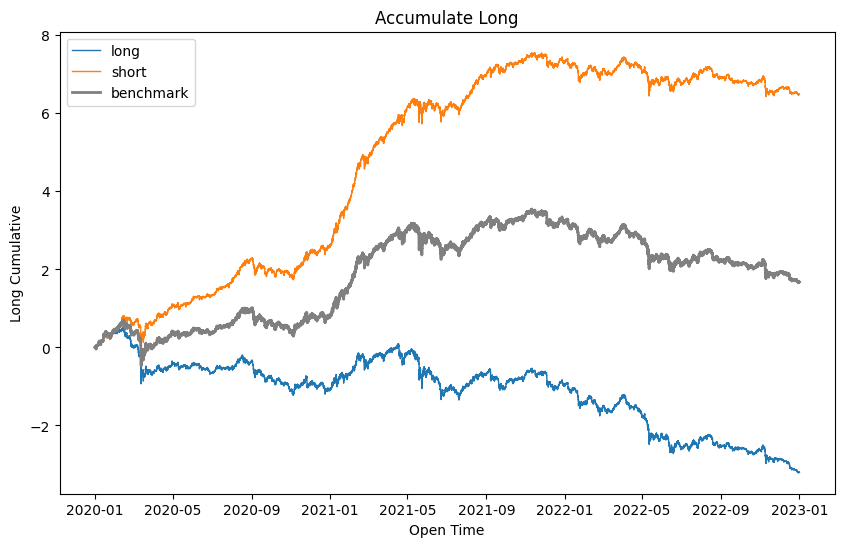

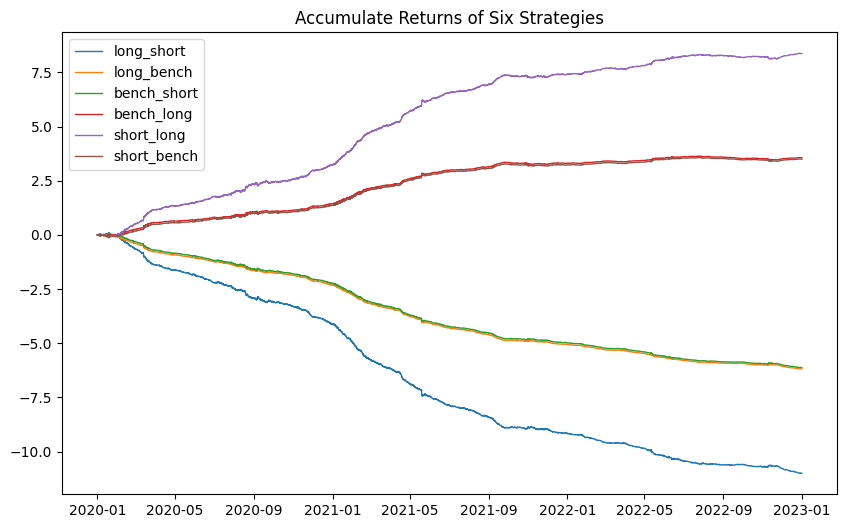

long: 
ann_return = -1.0665  sharpe = -0.9738  maxdd = 2.4593  calmar_ratio = -0.4337  

short: 
ann_return = 2.1598  sharpe = 1.9673  maxdd = 0.4969  calmar_ratio = 4.3463  

bench: 
ann_return = 0.5575  sharpe = 0.513  maxdd = 0.6895  calmar_ratio = 0.8085  

long_short: 
ann_return = -3.6643  sharpe = -12.5107  maxdd = 10.1258  calmar_ratio = -0.3619  

long_bench: 
ann_return = -2.062  sharpe = -13.9784  maxdd = 6.1292  calmar_ratio = -0.3364  

bench_long: 
ann_return = 1.186  sharpe = 8.04  maxdd = 0.0787  calmar_ratio = 15.063  

short_long: 
ann_return = 2.7883  sharpe = 9.5198  maxdd = 0.1697  calmar_ratio = 16.4305  

short_bench: 
ann_return = 1.1643  sharpe = 7.907  maxdd = 0.1228  calmar_ratio = 9.4806  

bench_short: 
ann_return = -2.0403  sharpe = -13.8563  maxdd = 5.8099  calmar_ratio = -0.3512  



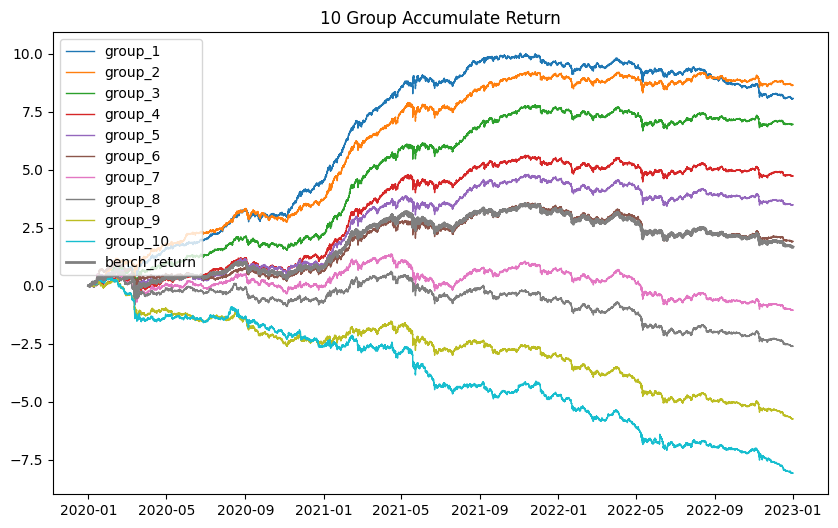

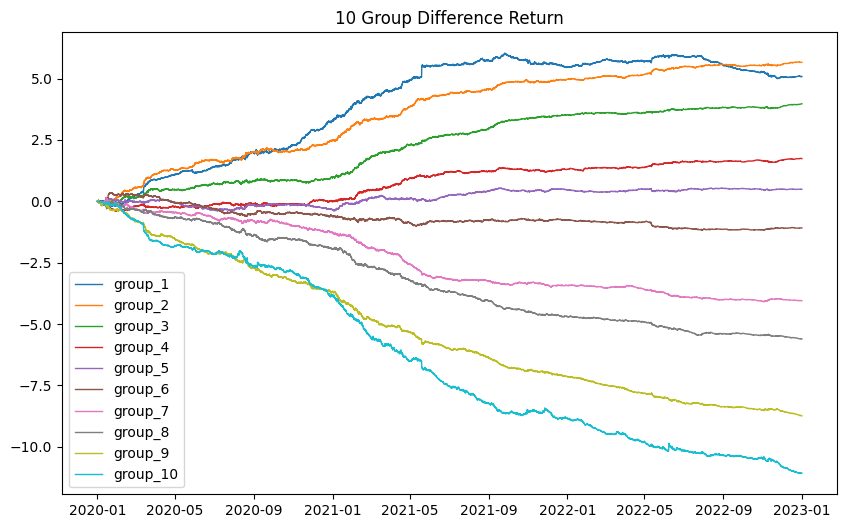

group_1: 
ann_return = 2.6885  sharpe = 2.3138  maxdd = 0.4003  calmar_ratio = 6.7161  

group_2: 
ann_return = 2.8793  sharpe = 2.5065  maxdd = 0.4041  calmar_ratio = 7.1252  

group_3: 
ann_return = 2.3188  sharpe = 2.0205  maxdd = 0.5675  calmar_ratio = 4.0863  

group_4: 
ann_return = 1.5743  sharpe = 1.4085  maxdd = 0.6532  calmar_ratio = 2.4101  

group_5: 
ann_return = 1.16  sharpe = 1.0342  maxdd = 0.6746  calmar_ratio = 1.7196  

group_6: 
ann_return = 0.635  sharpe = 0.5671  maxdd = 0.5885  calmar_ratio = 1.079  

group_7: 
ann_return = -0.3528  sharpe = -0.3135  maxdd = 1.0282  calmar_ratio = -0.3432  

group_8: 
ann_return = -0.8703  sharpe = -0.7656  maxdd = 1.9998  calmar_ratio = -0.4352  

group_9: 
ann_return = -1.9137  sharpe = -1.6467  maxdd = 4.7188  calmar_ratio = -0.4056  

group_10: 
ann_return = -2.6909  sharpe = -2.2226  maxdd = 6.0182  calmar_ratio = -0.4471  

-----------------------------------------
group_difference_1: 
ann_return = 1.693  sharpe = 3.787  ma

In [2]:
factors = df.select(['open_time', 'symbol', 'volume_weighted_price_change'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()